# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](attachment:pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


['the', 'to', 'and', 'you', 'of', 'is', 'it', 'in', 'that', 'my', 'for', 'on', 'be', 'me', 'this', 'so', 'have', 'not', 'just', 'but', 'with', 'at', 'can', 'all', 'like', 'are', 'your', 'was', 'when', 'if']


<ipython-input-45-0789af2b0c05>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels([t[0] for t in token_freq[:30]], rotation = 90)


[Text(0, 0, 'the'),
 Text(1, 0, 'to'),
 Text(2, 0, 'and'),
 Text(3, 0, 'you'),
 Text(4, 0, 'of'),
 Text(5, 0, 'is'),
 Text(6, 0, 'it'),
 Text(7, 0, 'in'),
 Text(8, 0, 'that'),
 Text(9, 0, 'my'),
 Text(10, 0, 'for'),
 Text(11, 0, 'on'),
 Text(12, 0, 'be'),
 Text(13, 0, 'me'),
 Text(14, 0, 'this'),
 Text(15, 0, 'so'),
 Text(16, 0, 'have'),
 Text(17, 0, 'not'),
 Text(18, 0, 'just'),
 Text(19, 0, 'but'),
 Text(20, 0, 'with'),
 Text(21, 0, 'at'),
 Text(22, 0, 'can'),
 Text(23, 0, 'all'),
 Text(24, 0, 'like'),
 Text(25, 0, 'are'),
 Text(26, 0, 'your'),
 Text(27, 0, 'was'),
 Text(28, 0, 'when'),
 Text(29, 0, 'if')]

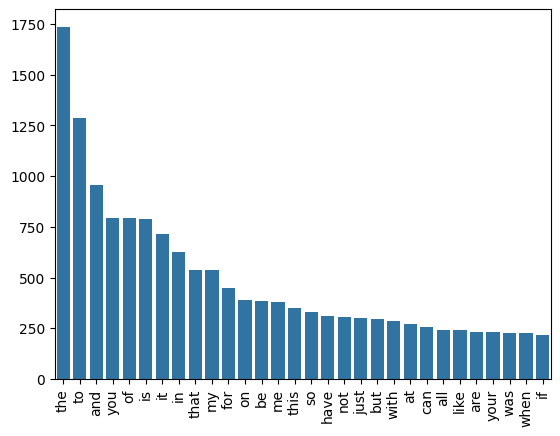

In [45]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns

count_vect = CountVectorizer()

count_vect.fit(train_df['text'])

train_data_words = count_vect.transform(train_df['text'])

tokens=count_vect.get_feature_names_out()

token_counts = np.array(train_data_words.sum(axis=0)).flatten()

token_freq = sorted(zip(tokens, token_counts), key=lambda x: x[1], reverse=True)

print([t[0] for t in token_freq[:30]])

g = sns.barplot(x=[t[0] for t in token_freq[:30]],
            y=[t[1] for t in token_freq[:30]])
g.set_xticklabels([t[0] for t in token_freq[:30]], rotation = 90)

['the', 'to', 'and', 'it', 'of', 'you', 'is', 'in', 'for', 'that', 'my', 'on', 'be', 'me', 'so', 'was', 'can', 'all', 'at', 'have', 'are', 'just', 'with', 'but', 'get', 'like', 'not', 'this', 'up', 'your']


<ipython-input-46-498d34ed0363>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels([t[0] for t in token_freq[:30]], rotation = 90)


[Text(0, 0, 'the'),
 Text(1, 0, 'to'),
 Text(2, 0, 'and'),
 Text(3, 0, 'it'),
 Text(4, 0, 'of'),
 Text(5, 0, 'you'),
 Text(6, 0, 'is'),
 Text(7, 0, 'in'),
 Text(8, 0, 'for'),
 Text(9, 0, 'that'),
 Text(10, 0, 'my'),
 Text(11, 0, 'on'),
 Text(12, 0, 'be'),
 Text(13, 0, 'me'),
 Text(14, 0, 'so'),
 Text(15, 0, 'was'),
 Text(16, 0, 'can'),
 Text(17, 0, 'all'),
 Text(18, 0, 'at'),
 Text(19, 0, 'have'),
 Text(20, 0, 'are'),
 Text(21, 0, 'just'),
 Text(22, 0, 'with'),
 Text(23, 0, 'but'),
 Text(24, 0, 'get'),
 Text(25, 0, 'like'),
 Text(26, 0, 'not'),
 Text(27, 0, 'this'),
 Text(28, 0, 'up'),
 Text(29, 0, 'your')]

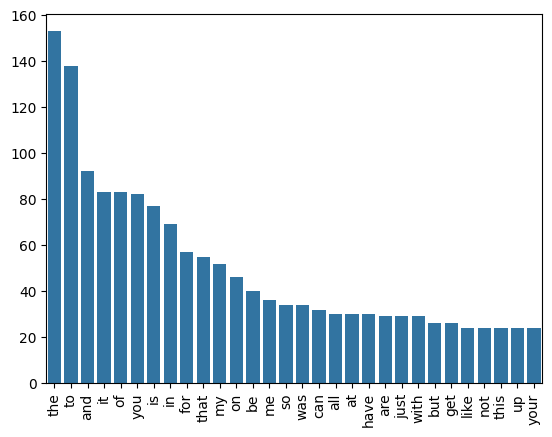

In [46]:
count_vect = CountVectorizer()

count_vect.fit(test_df['text'])

test_data_words = count_vect.transform(test_df['text'])

tokens=count_vect.get_feature_names_out()

token_counts = np.array(test_data_words.sum(axis=0)).flatten()

token_freq = sorted(zip(tokens, token_counts), key=lambda x: x[1], reverse=True)

print([t[0] for t in token_freq[:30]])

g = sns.barplot(x=[t[0] for t in token_freq[:30]],
            y=[t[1] for t in token_freq[:30]])
g.set_xticklabels([t[0] for t in token_freq[:30]], rotation = 90)

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [47]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [48]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [49]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


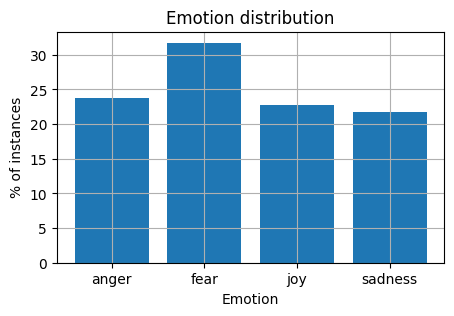

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [53]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [54]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [55]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [56]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [58]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your loss might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [59]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [60]:
import nltk
nltk.download('punkt_tab')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [61]:
train_data_BOW_features_500.toarray()

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [62]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [63]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [64]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

train_data_TFIDF_features_1000.shape

(3613, 1000)

In [65]:
feature_names_1000 = TFIDF_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [67]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'joy', 'fear', 'anger', 'joy', 'fear', 'joy',
       'anger', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [68]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [69]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [70]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [17]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

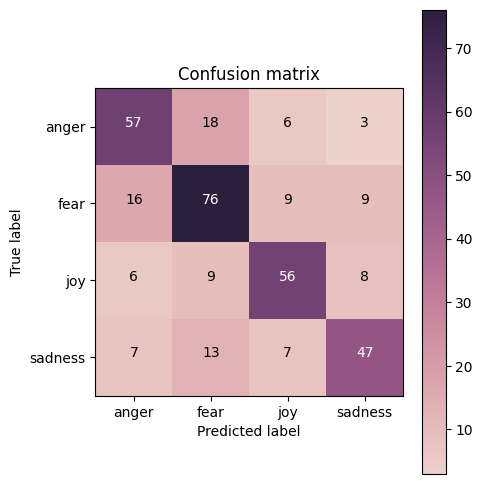

In [72]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [73]:
# Answer here
"""
For the confusion matrix
The diagonal from top left to bottom right are the correct predictions. The rest are misclassifications
As observed, "fear" is the most predicted label, followed by "anger".
These 2 labels also have the greatest portion of misclassification with each other.
Which means there may be some degree of similarity with the 2 labels.
"""

'\nFor the confusion matrix\nThe diagonal from top left to bottom right are the correct predictions. The rest are misclassifications\nAs observed, "fear" is the most predicted label, followed by "anger". \nThese 2 labels also have the greatest portion of misclassification with each other. \nWhich means there may be some degree of similarity with the 2 labels.\n'

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [74]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
## build DecisionTree model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'joy', 'fear', 'anger', 'fear', 'anger', 'anger',
       'fear', 'fear'], dtype='<U7')

In [75]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [76]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


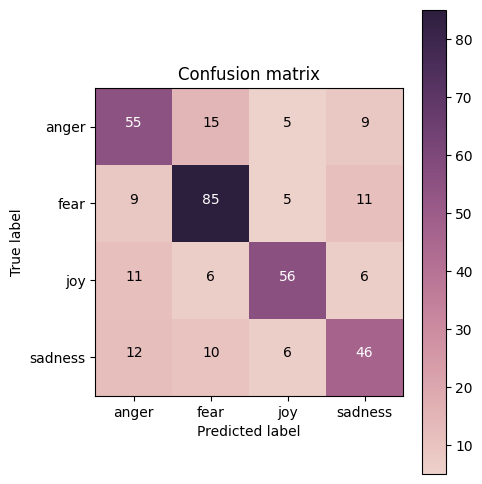

In [78]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [79]:
# Answer here
"""
Decision tree model has much higher training accuracy but the testing accuracy is lower compared to Naive Bayes
Their testing accuracy result is very close
This is probably because Naive Bayes captures an overall trend using a probablistic approach.
While decision tree interprets the trend based on the exact data.
So when the data from the two datasets are not similar enough, decision tree would perform worse.
"""

'\nDecision tree model has much higher training accuracy but the testing accuracy is lower compared to Naive Bayes\nTheir testing accuracy result is very close\nThis is probably because Naive Bayes captures an overall trend using a probablistic approach. \nWhile decision tree interprets the trend based on the exact data.\nSo when the data from the two datasets are not similar enough, decision tree would perform worse.\n'

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](attachment:pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [80]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
import keras

In [82]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [27]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1007     fear
1477     fear
2757      joy
134     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [84]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](attachment:pic2.png)

In [85]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [86]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3119 - loss: 1.3615 - val_accuracy: 0.4467 - val_loss: 1.2882
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5895 - loss: 1.0899 - val_accuracy: 0.6599 - val_loss: 0.9543
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.6083 - val_accuracy: 0.6888 - val_loss: 0.8066
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8644 - loss: 0.4028 - val_accuracy: 0.6772 - val_loss: 0.8126
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8946 - loss: 0.3122 - val_accuracy: 0.6888 - val_loss: 0.8275
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9233 - loss: 0.2440 - val_accuracy: 0.6888 - val_loss: 0.8936
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9355 - loss: 0.2061 - val_accuracy: 0.6830 - val_loss: 0.9619
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9499 - loss: 0.1683 - val_accuracy: 0.

### 6.5 Predict on testing data

In [87]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[6.5781213e-03, 6.3845102e-04, 9.5366150e-01, 3.9121974e-02],
       [1.0622972e-04, 9.9979734e-01, 2.9201999e-09, 9.6508484e-05],
       [9.3076602e-07, 8.7963468e-05, 9.9991101e-01, 1.7252081e-08],
       [1.8844528e-06, 9.9997932e-01, 1.5625785e-05, 3.0469139e-06],
       [9.9982166e-01, 1.4000082e-04, 6.3779817e-06, 3.1784522e-05]],
      dtype=float32)

In [88]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'joy', 'fear', 'anger'], dtype=object)

In [89]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [90]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.353999,1.327038,0.446686,1.288245
1,1,0.637420,0.990974,0.659942,0.954259
2,2,0.794354,0.583078,0.688761,0.806564
3,3,0.852477,0.412036,0.677233,0.812610
4,4,0.885137,0.322023,0.688761,0.827483
5,5,0.914752,0.257435,0.688761,0.893570
6,6,0.931359,0.213289,0.682997,0.961891
7,7,0.945198,0.180322,0.674352,1.023094
8,8,0.953501,0.151546,0.682997,1.039685
9,9,0.964572,0.129450,0.671470,1.099304


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](attachment:pic3.png)


![pic4.png](attachment:pic4.png)

In [91]:
df=pd.melt(training_log,['epoch'])
df

,epoch,variable,value
0,0,accuracy,0.353999
1,1,accuracy,0.637420
2,2,accuracy,0.794354
3,3,accuracy,0.852477
4,4,accuracy,0.885137
...,...,...,...
95,20,val_loss,1.528692
96,21,val_loss,1.584373
97,22,val_loss,1.600410
98,23,val_loss,1.636312


In [92]:
df1=df[df['variable'].isin(['accuracy', 'val_accuracy'])]

In [93]:
df2=df[df['variable'].isin(['loss', 'val_loss'])]

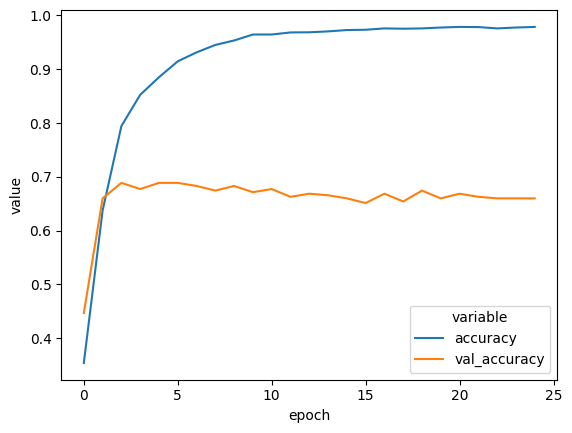

In [94]:
g_acc = sns.lineplot(data=df1, x='epoch', y='value', hue='variable')

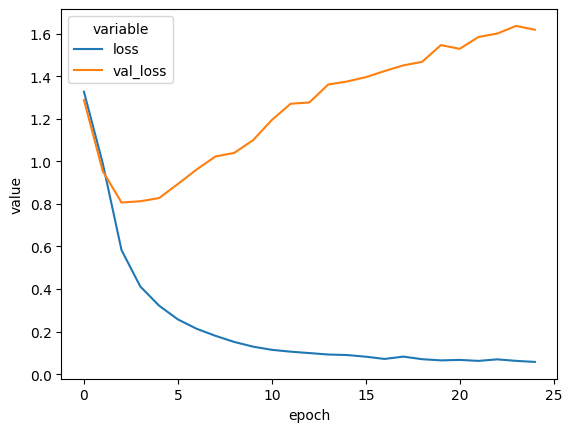

In [95]:
g_loss = sns.lineplot(data=df2, x='epoch', y='value', hue='variable')

In [96]:
"""
We can clearly see overfitting taking place. Overfitting occurs when the validation loss goes up when the training loss goes down.
Which means the model fits the training data too much and can't generalize to other datasets well
"""

"\nWe can clearly see overfitting taking place. Overfitting occurs when the validation loss goes up when the training loss goes down.\nWhich means the model fits the training data too much and can't generalize to other datasets well\n"

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [97]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
154,10154,@DFSCare apparently you are to contact me. Sof...,"[@, DFSCare, apparently, you, are, to, contact..."
1448,20591,I always thought I was too empathetic but it's...,"[I, always, thought, I, was, too, empathetic, ..."
158,10158,Zero help from @ups customer service. Just pus...,"[Zero, help, from, @, ups, customer, service, ..."
2963,40136,From My head to think it was better but obviou...,"[From, My, head, to, think, it, was, better, b..."
2639,30635,@MalYoung @AngelicaMcD I hope to now see some ...,"[@, MalYoung, @, AngelicaMcD, I, hope, to, now..."


In [98]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'DFSCare', 'apparently', 'you', 'are', 'to', 'contact', 'me', '.', 'Sofas', 'were', 'meant', 'to', 'be', 'delivered', 'today', '.', 'Old', 'ones', 'gone', '.', 'Sitting', 'on', 'floor', '.', 'No', 'sofas', '!', '#', 'fuming']),
       list(['I', 'always', 'thought', 'I', 'was', 'too', 'empathetic', 'but', 'it', "'s", 'becoming', 'clear', 'that', 'the', 'majority', 'of', 'you', 'guys', 'are', 'plain', 'insensitive', 'to', 'an', 'alarming', 'degree']),
       list(['Zero', 'help', 'from', '@', 'ups', 'customer', 'service', '.', 'Just', 'pushing', 'the', 'buck', 'back', 'and', 'forth', 'and', 'promising', 'callbacks', 'that', 'don', '’', 't', 'happen', '.', '#', 'loathing'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [99]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [100]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.54277194,  0.2786687 , -0.12377826,  0.1191131 , -0.4919906 ,
       -0.7307381 ,  0.5574773 ,  1.1887944 , -0.47774366, -0.4340334 ,
       -0.32857075, -0.4907127 , -0.16400288, -0.07189567, -0.15376315,
       -0.12024435,  0.42981675, -0.53169835, -0.10205846, -1.0964268 ,
        0.722509  ,  0.78581846,  0.46955365, -0.1149452 ,  0.29993603,
        0.46189678, -0.9935749 ,  0.37017593, -0.16392748,  0.15849034,
        0.1261106 , -0.08300575,  0.5738946 , -0.6092231 , -0.02635285,
        0.8148318 ,  0.98098963, -0.09190153, -0.80518323, -0.13820533,
       -0.40658504, -0.19723073, -0.6542154 ,  0.3392242 ,  0.6017109 ,
       -0.08575398, -0.8656767 ,  0.14649616,  0.7162434 ,  0.18381974,
        0.00966577, -0.8147341 ,  0.20262706, -0.13081552, -0.39822826,
       -0.05986667,  0.23706454, -0.67113626, -0.17875162,  0.4570411 ,
       -0.0797352 , -0.5452178 ,  0.6033421 ,  0.34452927, -0.7166044 ,
        0.7742321 ,  0.01061917,  0.637771  , -1.3265729 ,  0.93

In [101]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9208656549453735),
 ('birthday', 0.9150941371917725),
 ('bday', 0.9150850772857666),
 ('smile', 0.9119853377342224),
 ('plz', 0.9052172303199768),
 ('cats', 0.903502881526947),
 ('help', 0.902268648147583),
 ('Makes', 0.8995082378387451),
 ('O', 0.899301290512085),
 ('Kik', 0.8963319659233093)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [104]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
#w2v_google_model = api.load("word2vec-google-news-300")

print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [103]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [105]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [106]:
# Answer here
"""
We can perform max pooling or average pooling over all the vectors in a sentence. Then use the resulting vectors to build a model
Below is a simple model that utilizes neural network, performed using a word2vec model trained from given data and a pretrained model
Note that the google news data would not be present on the github version. Because uploading a 1.6G file there is crazy
"""
pooling_type = "avg"

In [107]:
def pool(sentence,word2vec_model,mode):
    vectors = [word2vec_model[word] for word in sentence if word in word2vec_model]
    if vectors:
        if mode=='avg':
            return np.mean(vectors, axis=0)
        if mode=='max':
            return np.amax(vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

In [108]:
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))
test_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
269,30898,@r0Ils ppl get triggered over u smiling they'r...,"[@, r0Ils, ppl, get, triggered, over, u, smili..."
152,21215,When you're scared to press send #bgoodthepoet...,"[When, you, 're, scared, to, press, send, #, b..."
222,30851,Heather that was #hilarious! @MsHeatherBates @...,"[Heather, that, was, #, hilarious, !, @, MsHea..."
181,21244,Not the best horror ever but I like that the u...,"[Not, the, best, horror, ever, but, I, like, t..."
17,10874,@__NETFLIXNCHILL I fuck with madden way harder,"[@, __NETFLIXNCHILL, I, fuck, with, madden, wa..."


In [109]:
vec_train=[]
for i in train_df['text_tokenized']:
    vec_train.append(pool(i,word2vec_model.wv,pooling_type))
vec_train_df=pd.DataFrame(vec_train)
vec_train_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.136289,0.271019,0.211990,0.199226,0.015363,-0.684246,0.346294,1.060743,-0.568915,-0.580361,...,0.497642,0.257755,0.273176,0.252126,0.961010,0.413183,0.101634,-0.437532,-0.028150,0.131717
1,-0.261381,0.536299,0.320883,-0.027032,0.224742,-0.684293,0.520818,0.974500,-0.677362,-0.686095,...,0.663723,0.205710,0.390087,0.057604,1.004345,0.467289,0.300769,-0.394673,-0.184216,0.050169
2,-0.188375,0.296323,0.095737,0.128252,0.114983,-0.629786,0.216526,0.916529,-0.376640,-0.434314,...,0.390848,0.158029,0.218058,0.179299,0.821914,0.474874,0.141429,-0.407945,0.020692,-0.150545
3,-0.168191,0.396613,0.159570,0.494898,-0.132430,-0.832170,0.245652,1.407617,-0.659015,-0.630412,...,0.391968,0.442119,0.322187,0.458044,1.435733,0.582132,-0.148768,-0.435156,0.122116,0.162645
4,-0.197552,0.363346,0.217236,0.008981,0.160322,-0.653197,0.365777,0.891277,-0.562407,-0.473385,...,0.528427,0.217983,0.337541,0.079709,0.826704,0.447703,0.245778,-0.335792,-0.107687,-0.096060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,-0.174291,0.403618,0.410455,-0.134430,0.252339,-0.682367,0.506339,1.001557,-0.723300,-0.708003,...,0.797897,0.201691,0.450262,0.085973,0.962477,0.497843,0.315705,-0.443174,-0.278543,0.140475
3609,-0.218046,0.521947,0.419728,-0.003652,0.188278,-0.795721,0.643087,1.123910,-0.872953,-0.702461,...,0.693187,0.292962,0.450830,0.122961,1.159676,0.448943,0.230287,-0.484284,-0.274765,0.062907
3610,-0.247976,0.539261,0.393593,-0.053863,0.263243,-0.898281,0.697129,1.171149,-0.811803,-0.874489,...,0.877538,0.203287,0.482291,0.015543,1.322609,0.414235,0.273922,-0.592594,-0.294882,0.016973
3611,-0.240855,0.457823,0.304616,0.046844,0.152234,-0.731342,0.468192,0.985043,-0.633477,-0.617857,...,0.565099,0.219090,0.293193,0.088370,1.002270,0.467920,0.254361,-0.451989,-0.140839,-0.074406


In [110]:
vec_test=[]
for i in test_df['text_tokenized']:
    vec_test.append(pool(i,word2vec_model.wv,pooling_type))
vec_test_df=pd.DataFrame(vec_test)
vec_test_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.179193,0.303532,0.499046,-0.059684,0.373646,-0.664386,0.536846,1.084093,-0.749007,-0.587378,...,0.612977,0.185109,0.369173,0.092530,0.942585,0.332399,0.341142,-0.572208,-0.248698,0.267348
1,-0.021063,0.242728,-0.022569,1.045245,-0.484866,-1.073177,0.187568,1.844188,-0.574253,-0.772471,...,0.258998,0.471917,0.159015,0.792031,1.787237,0.575399,-0.585543,-0.818230,0.401979,0.339712
2,-0.249688,0.175448,0.036117,0.754601,0.091437,-0.924133,-0.018583,1.664615,-0.817614,-0.411761,...,-0.078035,0.637185,0.244841,0.723300,1.496443,0.263171,-0.402984,-0.517614,0.290433,0.310456
3,-0.379256,0.587145,0.318180,-0.045510,0.371718,-0.885757,0.604223,1.169447,-0.674366,-0.904306,...,0.779595,0.151994,0.411193,0.032560,1.223541,0.570845,0.333209,-0.650498,-0.245749,-0.077906
4,-0.297363,0.381489,0.238121,-0.125797,0.307200,-0.602681,0.363619,0.930646,-0.760210,-0.452642,...,0.489012,0.190625,0.380876,0.090083,0.794194,0.320312,0.267670,-0.385928,-0.222157,0.012882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,-0.296204,0.301647,0.040727,-0.095948,0.294376,-0.938062,0.317053,1.281551,-0.536280,-0.802308,...,1.085550,0.328160,0.534266,0.118430,1.241662,0.829244,0.279551,-0.451615,-0.115793,-0.308224
343,-0.004316,0.407953,0.382404,-0.014800,0.135792,-0.746717,0.648000,0.965578,-0.664807,-0.721551,...,0.824506,0.292979,0.484032,0.017611,1.056163,0.374744,0.236165,-0.269227,-0.276949,0.038464
344,-0.258114,0.503764,0.613029,-0.134405,0.351573,-0.909109,0.671122,1.230187,-0.929587,-0.785078,...,0.937286,0.292511,0.512966,0.130607,1.265491,0.623560,0.315974,-0.694691,-0.462671,0.034110
345,-0.242053,0.553575,0.135785,0.216065,0.031069,-0.921957,0.387994,1.089192,-0.357851,-0.801278,...,0.691980,0.132707,0.174480,0.189021,1.084841,0.697375,0.166416,-0.634575,-0.042740,-0.321905


In [111]:
# standardize name (X, y)
X_train = vec_train_df
y_train = train_df['emotion']

X_test = vec_test_df
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 100)
y_train.shape:  (3613,)
X_test.shape:  (347, 100)
y_test.shape:  (347,)


In [112]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 154       anger
1448       fear
158       anger
2963    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [113]:
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  100
output_shape:  4


In [114]:
# input layer
model_input = Input(shape=(input_shape, ))
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,884 (42.52 KB)

 Trainable params: 10,884 (42.52 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
csv_logger = CSVLogger('logs/training_log2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3282 - loss: 1.3632 - val_accuracy: 0.3199 - val_loss: 1.3749
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3325 - loss: 1.3364 - val_accuracy: 0.3285 - val_loss: 1.3771
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3445 - loss: 1.3330 - val_accuracy: 0.3372 - val_loss: 1.3850
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3509 - loss: 1.3281 - val_accuracy: 0.3285 - val_loss: 1.3846
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3576 - loss: 1.3251 - val_accuracy: 0.2997 - val_loss: 1.3804
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3557 - loss: 1.3242 - val_accuracy: 0.3199 - val_loss: 1.3983
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3587 - loss: 1.3199 - val_accuracy: 0.3228 - val_loss: 1.3797
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3514 - loss: 1.3306 - val_accuracy: 0.

In [116]:
vec_train=[]
for i in train_df['text_tokenized']:
    vec_train.append(pool(i,w2v_google_model,pooling_type))
vec_train_df=pd.DataFrame(vec_train)
vec_train_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.018579,0.013544,0.059460,0.079552,-0.026982,-0.003124,0.006716,-0.069185,0.111952,0.154015,...,-0.090460,0.036747,-0.058178,0.007100,0.037392,-0.057301,0.018143,-0.069589,0.068448,-0.010223
1,0.051958,0.018980,-0.014690,0.118608,-0.117446,0.008251,0.097842,-0.051808,0.103341,0.055005,...,-0.073536,0.045865,-0.093409,0.023440,-0.054947,-0.002622,0.037132,-0.035536,0.090779,-0.010426
2,-0.032668,0.032369,0.016166,0.107829,-0.033552,-0.024741,-0.007619,-0.080654,0.076431,0.094371,...,0.029093,0.081342,-0.089743,0.033912,-0.014300,-0.008455,0.022335,0.009195,-0.006827,0.037964
3,0.021842,-0.029345,0.033497,0.087498,-0.062192,0.012370,-0.015433,-0.165905,0.152428,0.072382,...,0.004534,0.071446,-0.111053,0.012907,-0.090690,-0.033755,-0.079706,-0.051865,0.081007,-0.016584
4,0.060364,0.013420,-0.008170,0.096973,0.016446,-0.021198,0.044695,-0.103911,0.037926,0.030914,...,-0.061935,0.062477,-0.120660,-0.048303,-0.039684,-0.040736,0.027646,-0.025683,0.049376,-0.017731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0.083350,0.055884,0.089985,0.074854,-0.078192,0.053516,0.011389,-0.079687,0.013867,0.060480,...,-0.057916,0.065524,-0.019562,0.047017,0.019202,-0.018970,-0.037610,-0.062766,0.055276,-0.045136
3609,0.035240,0.001301,-0.004381,0.115837,-0.026003,-0.015137,0.011032,-0.067474,0.085678,0.053654,...,-0.040673,0.029708,-0.143219,-0.013206,-0.046608,-0.035431,-0.019810,-0.039845,0.066612,-0.047325
3610,0.090421,-0.040812,0.069867,0.105377,-0.050427,-0.007980,0.063334,-0.094275,0.096457,0.056389,...,-0.032874,0.052312,-0.088641,-0.010730,-0.059676,-0.020688,-0.038065,-0.022018,0.016235,-0.070782
3611,0.006694,0.057007,0.072337,0.080466,-0.037338,-0.035891,-0.007753,-0.098882,0.081815,0.097000,...,-0.055722,0.043828,-0.081355,0.067001,-0.042922,-0.084864,-0.051332,-0.090342,0.042172,-0.032735


In [117]:
vec_test=[]
for i in test_df['text_tokenized']:
    vec_test.append(pool(i,w2v_google_model,pooling_type))
vec_test_df=pd.DataFrame(vec_test)
vec_test_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.012988,0.036417,0.073792,0.131445,-0.138770,-0.042456,0.013278,-0.092651,0.076666,0.092041,...,-0.008862,0.108301,-0.130957,-0.013379,-0.078534,-0.045361,-0.057452,-0.152713,0.021118,0.044922
1,0.021905,-0.053175,0.049276,0.043247,-0.073839,-0.019138,-0.072956,-0.147420,0.163758,0.109485,...,0.033569,0.044322,-0.152432,0.009465,-0.066989,-0.125135,-0.178650,-0.066766,0.024190,0.071977
2,-0.064067,-0.118444,0.033407,0.059530,-0.021139,-0.034383,-0.105647,-0.141479,0.125025,0.056030,...,0.104731,0.041951,-0.130005,0.053416,-0.095540,-0.129049,-0.133519,-0.127968,-0.009115,0.054059
3,0.031283,0.044579,0.056170,0.117032,-0.054671,0.006841,-0.007152,-0.070540,0.128440,0.104520,...,-0.113754,0.021018,-0.101152,0.046242,-0.023419,-0.014071,-0.049416,0.002655,0.023182,-0.063454
4,0.056013,-0.066873,0.054339,0.235212,-0.017753,0.030875,0.036360,-0.059605,0.070025,0.036691,...,0.016078,0.152618,-0.182469,0.029541,-0.127313,-0.091082,-0.057338,-0.019217,-0.102609,0.042411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.015514,0.033866,-0.045044,0.124268,-0.051703,-0.013786,0.018097,-0.115102,0.042999,0.049189,...,-0.064778,0.159663,-0.176299,0.040387,-0.064914,-0.028241,-0.026487,-0.035090,-0.003869,0.009287
343,0.033582,0.053661,0.046117,0.066962,-0.060121,0.041089,0.035004,-0.061749,0.026166,0.119653,...,-0.024186,0.087183,-0.106372,-0.025143,-0.101697,-0.017192,0.018787,-0.009921,0.040234,-0.031237
344,0.067463,0.038658,-0.006479,0.077411,0.006063,-0.028210,0.030305,-0.076580,0.062333,0.033175,...,-0.052274,0.054827,-0.071090,0.038602,-0.060674,-0.024994,-0.000083,-0.075919,0.005719,-0.012593
345,0.153592,0.152127,0.034946,0.052599,-0.077379,0.014377,-0.057366,-0.134203,0.136637,0.033434,...,-0.039601,-0.005805,-0.113451,-0.020004,-0.009318,-0.094028,-0.016317,-0.069892,0.076185,0.082275


In [118]:
X_train = vec_train_df
X_test = vec_test_df

In [119]:
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  300
output_shape:  4


In [120]:
# input layer
model_input = Input(shape=(input_shape, ))
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_2 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,684 (92.52 KB)

 Trainable params: 23,684 (92.52 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
csv_logger = CSVLogger('logs/training_log3.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3623 - loss: 1.3404 - val_accuracy: 0.4957 - val_loss: 1.1583
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5890 - loss: 1.0240 - val_accuracy: 0.6052 - val_loss: 0.9689
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - loss: 0.8244 - val_accuracy: 0.7061 - val_loss: 0.8409
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7250 - loss: 0.7207 - val_accuracy: 0.6628 - val_loss: 0.8422
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7302 - loss: 0.6876 - val_accuracy: 0.7118 - val_loss: 0.7746
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7429 - loss: 0.6548 - val_accuracy: 0.7032 - val_loss: 0.7810
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7514 - loss: 0.6253 - val_accuracy: 0.7262 - val_loss: 0.7856
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7810 - loss: 0.5752 - val_accuracy: 0.

In [122]:
"""
The result is significantly better when using a pre-trained model
"""

'\nThe result is significantly better when using a pre-trained model\n'

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [123]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [124]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](attachment:pic6.png)

In [125]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [126]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](attachment:pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:
![pic9-2.png](attachment:pic9-2.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [127]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

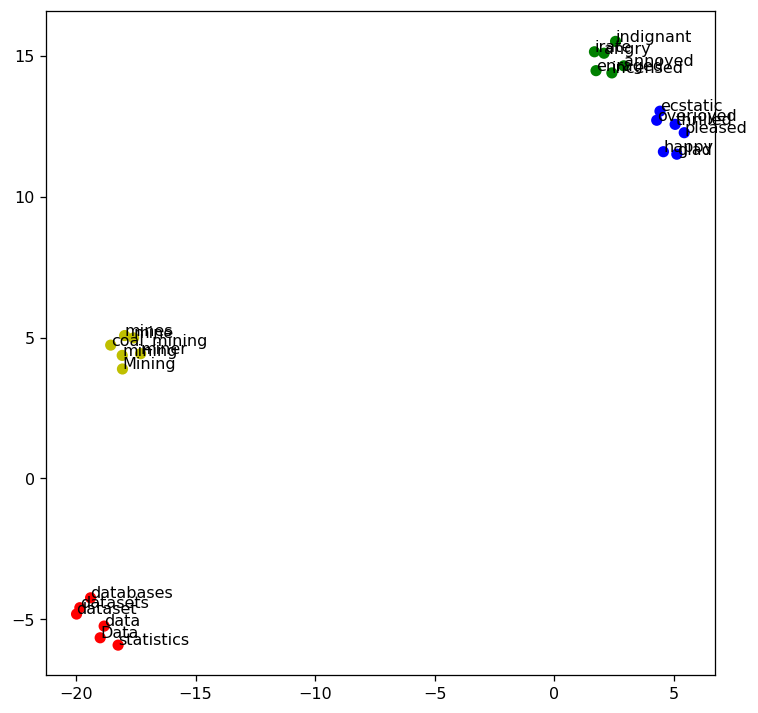

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

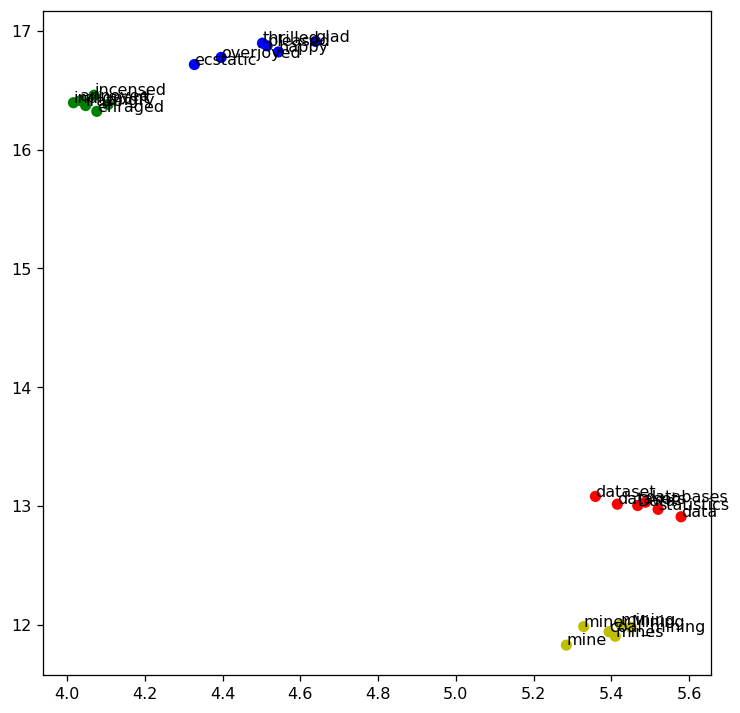

In [129]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [130]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

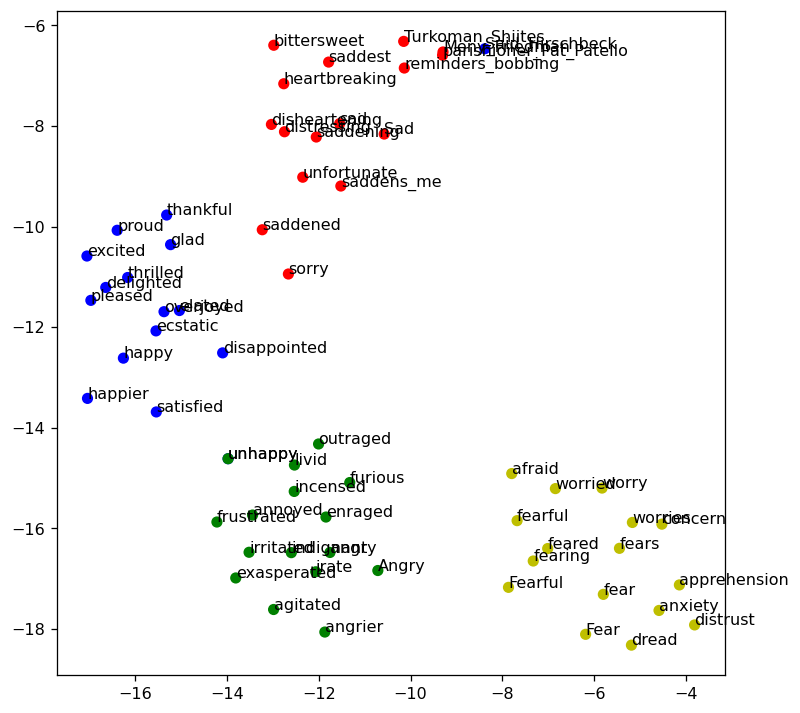

In [131]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

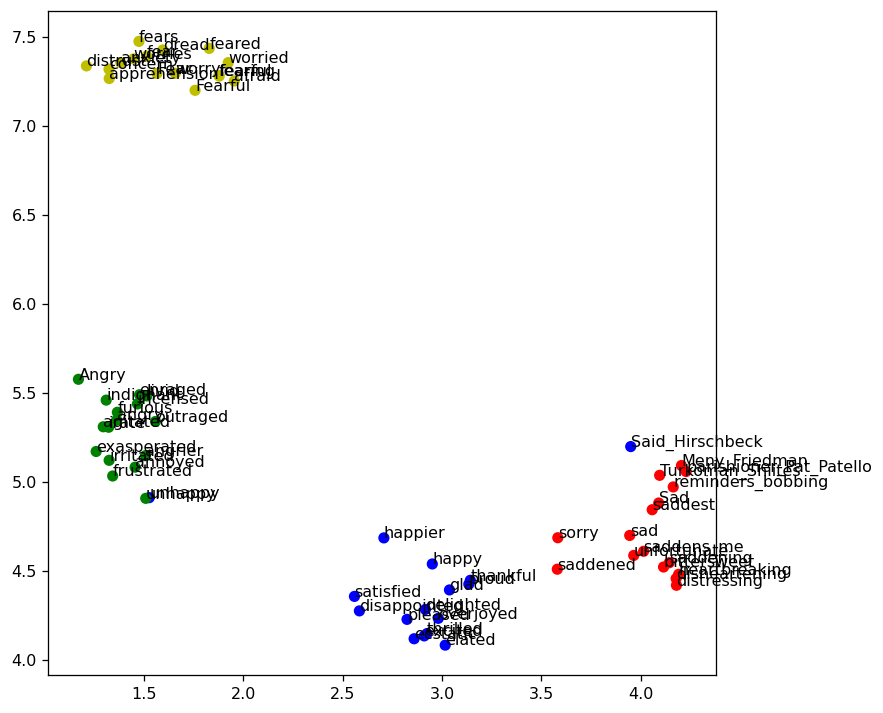

In [132]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [ ]:
"""
The umap clusters are closer together, there are also a lot more empty space in the umap clusters
"""

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
![pic10.png](attachment:pic10.png)

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [1]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

# Data Mining

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques, algorithms, and statistical methods to analyze and extract useful information from data.

## Key Characteristics

*   **Automated discovery**: Data mining uses algorithms and software tools to identify patterns and relationships in data.
*   **Large datasets**: Data mining is typically applied to very large datasets, often with millions or billions of records.
*   **Insight generation**: The ultimate goal of data mining is to generate actionable insights that can inform business decisions.

## Types of Data Mining

*   **Descriptive mining**: Identifies patterns and trends in historical data.
*   **Diagnostic mining**: Uses statistical models to identify the causes of a problem.
*   **Predictive mining**: Uses machine learning algorithms to forecast future outcomes.
*   **Prescriptive mining**: Recommends actions based o

**We can use the IPython library to make the response look better:**

In [2]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [3]:
display(Markdown(response['message']['content']))

# Data Mining
================

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques, algorithms, and statistical methods to analyze and extract useful information from data.

## Key Characteristics

*   **Automated discovery**: Data mining uses algorithms and software tools to identify patterns and relationships in data.
*   **Large datasets**: Data mining is typically applied to very large datasets, often with millions or billions of records.
*   **Insight generation**: The ultimate goal of data mining is to generate actionable insights that can inform business decisions.

## Types of Data Mining

*   **Descriptive mining**: Identifies patterns and trends in historical data.
*   **Diagnostic mining**: Uses statistical models to identify the causes of a problem.
*   **Predictive mining**: Uses machine learning algorithms to forecast future outcomes.
*   **Prescriptive mining**: Recommends actions based on predictions.

## Data Mining Techniques

*   **Clustering**: Groups similar data points together.
*   **Classification**: Assigns categorical labels to data points.
*   **Regression**: Predicts continuous values.
*   **Association rule mining**: Identifies relationships between variables.

## Applications of Data Mining

*   **Marketing**: Customer segmentation, product recommendations, and customer churn prediction.
*   **Finance**: Credit risk assessment, portfolio optimization, and fraud detection.
*   **Healthcare**: Disease diagnosis, patient outcomes prediction, and treatment recommendation.
*   **Retail**: Demand forecasting, inventory management, and supply chain optimization.

## Challenges in Data Mining

*   **Data quality issues**: Inaccurate or missing data can lead to biased results.
*   **Scalability**: Handling large datasets requires specialized hardware and software.
*   **Interpretability**: Understanding complex models and their outputs is crucial for decision-making.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [7]:
# Answer here
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'Why are there 24 hours in a day?'
    },
])

print(response['message']['content'])

In [8]:
# Answer here
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'Why are there 24 hours in a day?'
    },
])

print(response['message']['content'])

The reason we have 24 hours in a day is due to the Earth's rotation on its axis. The Earth takes approximately 24 hours to complete one full rotation, which means it rotates once on its axis every 24 hours.

This is because the Earth's rotational period, also known as its sidereal day, is approximately 23 hours, 56 minutes, and 4 seconds. However, this is not exactly the same as our modern definition of a day, which is based on solar time (the time it takes for the Earth to rotate once relative to the Sun).

To account for the extra fraction of an hour, ancient civilizations used various systems to divide the day into smaller units, such as hours, minutes, and seconds. The Babylonians, for example, divided the day into 24 equal periods, each lasting about 60 minutes.

The choice of 24 hours as the basis for our modern timekeeping system is thought to have originated from the ancient Babylonians, who used a sexagesimal (base-60) system that divided the circle into 360 degrees. This syst

In [9]:
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'assistant',
        'content': 'Why are there 24 hours in a day?'
    },
])

print(response['message']['content'])

 The reason for this is due to the Earth's rotation on its axis. It takes approximately 24 hours for the Earth to complete one full rotation, which is what we experience as a day.

This is because the Earth rotates once on its axis every 24 hours, causing day and night to cycle through in an uninterrupted sequence. The reason it takes exactly 24 hours for the Earth to complete one rotation is due to the way our solar system was formed and has been evolving over billions of years.

Is there anything else you would like to know about time or the Earth's rotation?


In [10]:
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'tool',
        'content': 'Why are there 24 hours in a day?'
    },
])

print(response['message']['content'])

The reason we have 24 hours in a day is due to the way our solar system was formed and evolved.

The Earth takes approximately 365.24 days to orbit the Sun, which is known as a solar year. This means that if we were to divide the number of seconds in a year into equal parts, we would get around 24 periods.

To be more precise, the Earth's rotation period (the time it takes for the planet to rotate once on its axis) is approximately 23 hours, 56 minutes, and 4.09 seconds. This means that if you were to count from midnight, you would have completed exactly 24 cycles of rotation when you reached noon on a new day.

The Babylonians, who lived in Mesopotamia (modern-day Iraq), are credited with being the first civilization to divide the day into 24 equal periods. They called each period an "hour," and they divided their calendar into two main parts: night (12 hours) and day (12 hours).

When the Romans adopted the Babylonian system, they also adopted the concept of dividing the day into 24 

In [ ]:
"""
There doesn't seem to be a response for the "system" role. Maybe it serves a special purpose
For the "user" role the language model outputs a detailed response, while it is more simplified for the "assistant" role
For the "tool" role the language model simply outputs the result as "facts" instead of a more humane response
"""

'\nThere doesn\'t seem to be a response for the "system" role. Maybe it serves a special purpose\nFor the "user" role the language model outputs a detailed response, while it is more simplified for the "assistant" role\n'

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](attachment:example1.png)
source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](attachment:example2.jpg)
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [14]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

The image captures a moment of pure joy and freedom, featuring a Shiba Inu dog in mid-air. The dog, with its body painted white and adorned with brown spots on the face and legs, is the star of this scene. Its pink tongue is hanging out as it jumps excitedly towards the right side of the frame, embodying the essence of playfulness.

The background provides a serene contrast to the energetic foreground. A lush green lawn stretches out behind the dog, leading to a wooden fence that adds a rustic charm to the scene. The photo is taken from a low angle, which enhances the sense of height and movement in the dog's leap.

Overall, this image beautifully encapsulates a moment of pure joy and freedom, with every element contributing to creating an atmosphere of playfulness and serenity.

In [15]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image presents a scene featuring a single, gray tabby cat. The cat stands on all fours, its body oriented towards the left side of the frame while its head is turned to face the camera. Its tail, raised high and adorned with black stripes, adds a dynamic element to the composition. The cat's eyes are open wide in an expression of curiosity or alertness as it gazes directly into the camera. The background is plain white, which contrasts with the gray hues of the cat and allows its features to stand out clearly. There are no other objects or creatures visible in the image, making the cat the sole focus of this photograph.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [21]:
# Answer here
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/inputpic.jpg'] #Image with the cat
    },
])

display(Markdown(response4['message']['content']))

In the heart of an urban setting, a curious cat embarks on a journey. The feline, adorned with a coat of gray and white fur, treads lightly along a concrete sidewalk. Its attention is captivated by something unseen, causing it to pause mid-stride and peer down at the ground. 

To the right of our feline friend, a red fire hydrant stands guard next to a matching red metal railing. The hydrant's vibrant color contrasts sharply with the muted tones of the concrete beneath it. 

The cat is not alone in its exploration. In the background, partially obscured by distance and focus, rests an orange pot. Its presence adds a touch of nature to this urban landscape. 

This scene captures a moment frozen in time - a snapshot of city life as seen through the eyes of a cat on patrol.

In [22]:
"""
The description is surprising accurate. Although it did misinterpret some objects to be present due to them not being shown completely in the picture.
It did better than how I would do with describing this picture at least
"""

'\nThe description is surprising accurate. Although it did misinterpret some objects to be present due to them not being shown completely in the picture.\nIt did better than how I would do with describing this picture at least\n'

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [ ]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

USER_AGENT environment variable not set, consider setting it to identify your requests.
C:\Users\fredy2\AppData\Local\Temp\ipykernel_7912\1128241468.py:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model


: 


### **Actual content in the URL:**
![pic11.png](attachment:pic11.png)

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
# Answer here
#I can't run the above kernel :( But I trust that this code should work

def load_and_retrieve_multiple_docs(url1,url2,url3):
    loader = WebBaseLoader(
        web_paths=([url1,url2,url3]),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()
url1=""
url2=""
url3=""
# Create the retriever
retriever_mult = load_and_retrieve_multiple_docs(url1,url2,url3)


result1 = rag_chain("")
display(Markdown(result1))
result2 = rag_chain("")
display(Markdown(result2))
result3 = rag_chain("")
display(Markdown(result3))

In [ ]:
"""
Advantage: It may provide more accurate answers based on the documents provided 
Disadvantage: If the provided documants are inaccurate it may negatively affect the results
"""

'\nAdvantage: It may provide more accurate answers based on the documents provided \n'

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [7]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [8]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [9]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [10]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
1007,20150,"After #terror our leaders say, 'Don't jump to ...",fear,0.729,"[1.191226601600647, 0.08579523861408234, 1.095..."
1477,20620,"@David_Stepp Any other election, fine vote 3rd...",fear,0.458,"[-2.1233675479888916, -0.3556678295135498, -1...."
2757,30753,my haters are like crickets. they chirp all da...,joy,0.208,"[-0.37986311316490173, 0.6266050338745117, -2...."
134,10134,How was Natalie one of the top three favorites...,anger,0.667,"[-0.8856055736541748, 0.3919188976287842, 1.51..."
98,10098,I wonder what American city will be next to pr...,anger,0.708,"[-3.1447677612304688, 0.5941314697265625, 1.61..."
...,...,...,...,...,...
1633,20776,Good start to the day I forgot to set my #alar...,fear,0.396,"[-0.2775673270225525, 0.6816650629043579, 0.94..."
2303,30299,"And the weather so breezy, man why can't life ...",joy,0.562,"[-1.8203089237213135, -0.16208291053771973, 3...."
1688,20831,@SteveBryantArt I was pretty sure it was a Gol...,fear,0.362,"[-0.5325936675071716, 0.27633094787597656, -0...."
1145,20288,#NawazSharif confesses that #Pakistan support...,fear,0.625,"[0.2540184557437897, 2.568312168121338, -2.100..."


In [11]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
269,30898,@r0Ils ppl get triggered over u smiling they'r...,joy,0.170,"[-0.14335614442825317, 0.8418378233909607, 3.8..."
303,40816,@trashcami this cured my depression,sadness,0.340,"[-0.05462425574660301, -1.3574150800704956, 2...."
226,30855,Each day is what you make of it! #goals #chall...,joy,0.604,"[0.5440692901611328, -0.08787638694047928, 2.7..."
11,10868,@DailyMirror i love how theres no outrage that...,anger,0.726,"[-0.6190511584281921, 1.4858551025390625, 4.57..."
231,30860,@len_snart Mick nods. 'I would like that.' He ...,joy,0.620,"[0.031780391931533813, -0.37514472007751465, -..."
...,...,...,...,...,...
196,30825,Nawaz Sharif is getting more funnier than @kap...,joy,0.580,"[-0.1257113665342331, 1.1954224109649658, 1.39..."
83,10940,Lol little things like that make me so angry x,anger,0.604,"[-2.274489402770996, -0.7885226011276245, 2.71..."
93,21156,There goes the butterflies in my stomach. #ner...,fear,0.812,"[0.15219688415527344, 0.6816550493240356, 1.16..."
224,30853,@GameGrumps THANK YOU SO MUCH FOR COMING TO DE...,joy,0.804,"[-1.597778081893921, 0.4371519684791565, 3.877..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [39]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.46397694524495675


In [40]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.40      0.44      0.42        84
        fear       0.53      0.55      0.54       110
         joy       0.45      0.43      0.44        79
     sadness       0.46      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.46      0.46      0.46       347
weighted avg       0.46      0.46      0.46       347



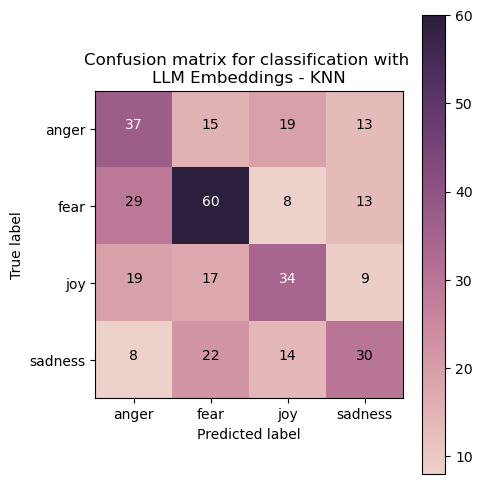

In [41]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [29]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [30]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [31]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [32]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [42]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [43]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [44]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25


c:\Users\fredy2\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7']
Received: inputs=Tensor(shape=(None, 3072))
  warnings.warn(msg)


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3943 - loss: 1.3900 - val_accuracy: 0.4986 - val_loss: 1.1450
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6468 - loss: 0.8752 - val_accuracy: 0.5389 - val_loss: 1.1728
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7287 - loss: 0.7068 - val_accuracy: 0.5620 - val_loss: 1.0783
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.5492 - val_accuracy: 0.5764 - val_loss: 1.1512
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8291 - loss: 0.4631 - val_accuracy: 0.5591 - val_loss: 1.2356
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3757 - val_accuracy: 0.5620 - val_loss: 1.3189
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8802 - loss: 0.3194 - val_accuracy: 0.5648 - val_loss: 1.4908
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9029 - loss: 0.2682 - val_accuracy: 0.5937 - val_

In [46]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\fredy2\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7']
Received: inputs=Tensor(shape=(128, 3072))
  warnings.warn(msg)


array([[2.6540726e-02, 9.4944723e-02, 6.4245518e-04, 8.7787211e-01],
       [4.1497841e-09, 1.5737158e-05, 7.5144925e-12, 9.9998426e-01],
       [3.4897044e-02, 9.6605688e-02, 8.6818361e-01, 3.1362861e-04],
       [4.8693302e-05, 4.5836750e-02, 6.8534445e-09, 9.5411462e-01],
       [8.8350913e-03, 5.7387538e-02, 8.9072347e-01, 4.3053877e-02]],
      dtype=float32)

In [47]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'sadness', 'joy', 'sadness', 'joy'], dtype=object)

In [48]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.57


In [49]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.457515,1.232528,0.498559,1.145025
1,1,0.639358,0.875760,0.538905,1.172764
2,2,0.714642,0.716885,0.561960,1.078334
3,3,0.779408,0.577027,0.576369,1.151184
4,4,0.811514,0.489483,0.559078,1.235644
5,5,0.848325,0.402881,0.561960,1.318885
6,6,0.876003,0.330067,0.564842,1.490822
7,7,0.899253,0.272693,0.593660,1.450395
8,8,0.924440,0.223794,0.587896,1.557912
9,9,0.938002,0.181533,0.544669,1.921247


In [50]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.76      0.33      0.46        84
        fear       0.54      0.79      0.64       110
         joy       0.58      0.63      0.61        79
     sadness       0.52      0.43      0.47        74

    accuracy                           0.57       347
   macro avg       0.60      0.55      0.54       347
weighted avg       0.60      0.57      0.55       347



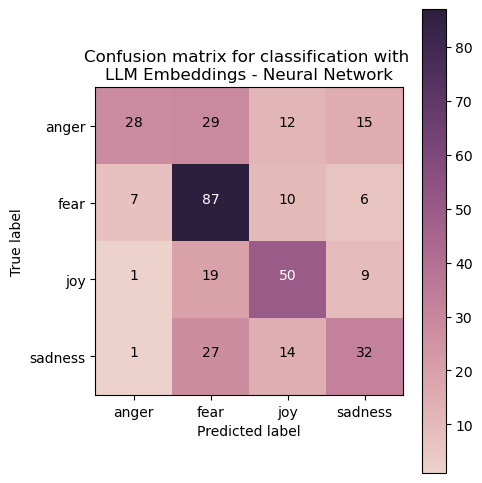

In [51]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

In [52]:
df=pd.melt(training_log,['epoch'])
df

,epoch,variable,value
0,0,accuracy,0.457515
1,1,accuracy,0.639358
2,2,accuracy,0.714642
3,3,accuracy,0.779408
4,4,accuracy,0.811514
...,...,...,...
95,20,val_loss,2.713620
96,21,val_loss,2.436118
97,22,val_loss,2.352065
98,23,val_loss,2.527221


In [53]:
df1=df[df['variable'].isin(['accuracy', 'val_accuracy'])]

In [54]:
df2=df[df['variable'].isin(['loss', 'val_loss'])]

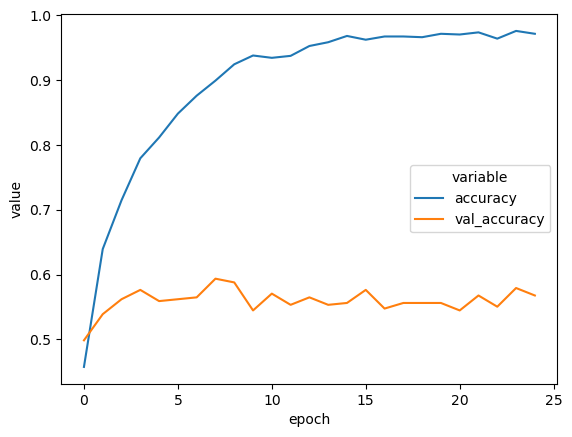

In [55]:
g_acc = sns.lineplot(data=df1, x='epoch', y='value', hue='variable')

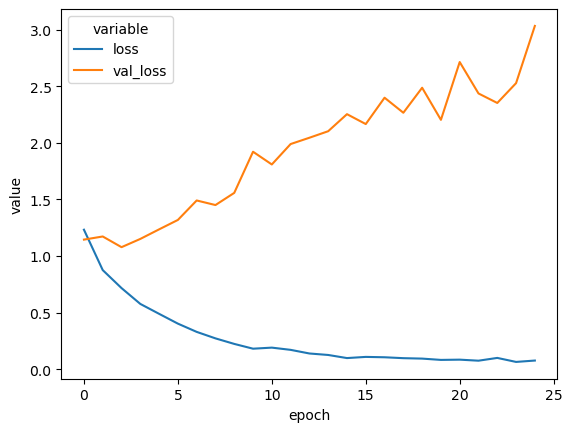

In [56]:
g_loss = sns.lineplot(data=df2, x='epoch', y='value', hue='variable')

In [ ]:
"""
The results for knn and the neural network are both worse than the simpler bag of words approach. 
I think the reason behind this is that the embeddings generated by the llm is too generalized. 
The dataset here classifies as internet speech. Which is usually less logical/consisent compared to usual speech. That's why the model gerenalized poorly to the data
This is purely specualtion though
"""

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [ ]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: frustration. Asking for reclassification.
Accuracy: 43.75%
              precision    recall  f1-score   support

       anger       0.43      0.60      0.50        20
        fear       0.00      0.00      0.00        20
         joy       0.41      0.70      0.52        20
     sadness       0.60      0.45      0.51        20

    accuracy                           0.44        80
   macro avg       0.36      0.44      0.38        80
weighted avg       0.36      0.44      0.38        80



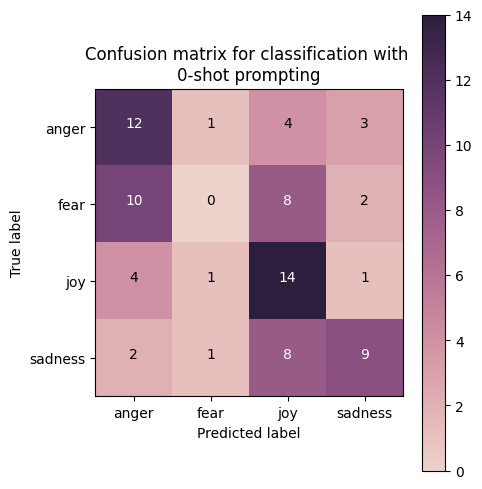

In [ ]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i dont im going to fight myself
Emotion: fear

Text: @BbeautifulSoul_ u always gotta attitude tho ... 😕 cheer up
Emotion: joy

Text: @happyandbashful Flirt, simper, pout, repeat. Yuck.
Emotion: sadness


Accuracy: 46.25%
              precision    recall  f1-score   support

       anger       0.40      0.70      0.51        20
        fear       1.00      0.05      0.10        20
         joy       0.44      0.75      0.56        20
     sadness       0.70      0.35      0.47        20

    accurac

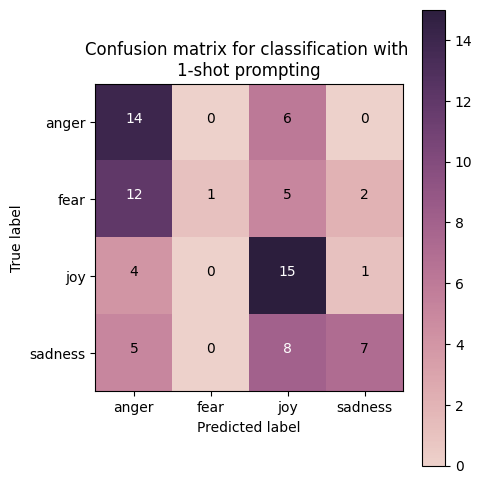

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: @josephperson Cam is still rattled from the backlash he received when he made the black QB comment and suffered the wrath of White America.
Emotion: anger

Text: When someone rudely says all women should have long hair and your inner feminist tries not to rage
Emotion: anger

Text: SOMEONE LET SNAKES IN MY HOUSE, I BET IT @Ya_Boi_Huck I KILL THAT BUGGER WHEN I GET MY HANDS ON HIM #rage #HuckFP2
Emotion: anger

Text: Who got madden 17 or 2k17 ps4 add TrackdawgT lets run it
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i don

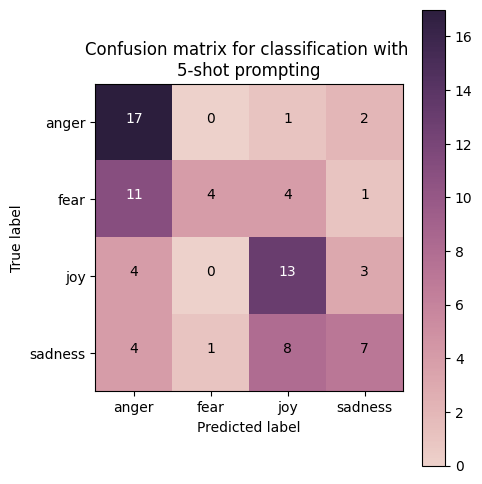

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
"""
We can see that the more examples we give to the model, the better it becomes at classification
This is probably due to the extra information contained within the examples allowing the model to fine-tune its performance
"""

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---